In [221]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns


<h3>Importing Data</h3>




In [222]:
import stats_can
eco_vec_map = {'Canada total average number of employees':'v1038100698',
               'Canada total wages and salaries expenses':'v1038100699',
               'Pilots total average number of employees':'v1038100686',
               'Pilots total wages and salaries expenses':'v1038100687',
               'Other flight personal total average number of employees':'v1038100686',
               'Other flight personal total wages and salaries expenses':'v1038100687',
               'General management average number of employees':'v1038100690',
               'General management total wages and salaries expenses':'v1038100691',
               'Maintenance personnel average number of employees':'v1038100692',
               'Maintenance personnel total wages and salaries expenses':'v1038100693',
               'Aircraft and traffic servicing average number of employees':'v1038100694',
               'Aircraft and traffic servicing total wages and salaries expenses':'v1038100695',
               'All other employees average number of employees':'v1038100696',
               'All other employees total wages and salaries expenses':'v1038100697',
               'Total operating revenue per employee':'v122615449',
               'Tonne-kilometres flown per employee':'v122615450',
               'Tonne-kilometres flown per employee':'v122615450',
               'Total passengers': 'v122615159',
               'Total hours flown': 'v122615165',
               'Number of carriers': 'v122615158',
               'Total, fuel and oil consumption quantity': 'v1038100718',
               'Total, fuel and oil consumption expense': 'v1038100719',
               'Total, operating revenue, scheduled and charter services': 'v122615327',
               'Total, scheduled services': 'v122615328',
               'Total, charter services': 'v122615331',
               'All other flight - related revenue': 'v122615334',
               'All other revenue': 'v122615335',
               'Total, operating expenses': 'v122615336',

               }

vectors = list(eco_vec_map.values())
df = stats_can.sc.vectors_to_df(vectors, periods = 10)

inv_map = {v: k for k, v in eco_vec_map.items()}
df.columns = df.columns.to_series().map(inv_map)
df.index.names = ['Date']


<h3>Understanding the data </h3>

In [223]:
df.head(10)

,"Total, fuel and oil consumption quantity","Total, fuel and oil consumption expense",Other flight personal total average number of employees,Other flight personal total wages and salaries expenses,General management average number of employees,General management total wages and salaries expenses,Maintenance personnel average number of employees,Maintenance personnel total wages and salaries expenses,Aircraft and traffic servicing average number of employees,Aircraft and traffic servicing total wages and salaries expenses,...,Tonne-kilometres flown per employee,"Total, operating revenue, scheduled and charter services","Total, scheduled services","Total, charter services",All other flight - related revenue,All other revenue,"Total, operating expenses",Number of carriers,Total passengers,Total hours flown
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6609677.0,5948905.0,10236.0,1162763.0,4276.0,321734.0,12473.0,736133.0,9439.0,423729.0,...,328831.0,20343071.0,17339379.0,1966571.0,80388.0,956733.0,19249356.0,98.0,66867.0,2811.0
2013-01-01,6569619.0,5912745.0,10426.0,1212291.0,4058.0,327102.0,12510.0,742923.0,9513.0,428492.0,...,322947.0,20816397.0,17764855.0,1938455.0,72058.0,1041029.0,19532300.0,97.0,67991.0,2822.0
2014-01-01,6974705.0,6251774.0,10420.0,1214672.0,4495.0,343558.0,12437.0,755559.0,9386.0,434910.0,...,343008.0,22309270.0,18951854.0,1983606.0,87569.0,1286242.0,20665843.0,93.0,72236.0,2921.0
2015-01-01,7070300.0,4874769.0,11261.0,1285216.0,4098.0,357488.0,12357.0,779063.0,9258.0,449534.0,...,357667.0,22832738.0,19804368.0,1455797.0,143014.0,1429559.0,20360220.0,93.0,76216.0,3136.0
2016-01-01,7255284.0,4405646.0,10485.0,1304671.0,3174.0,303145.0,12351.0,765650.0,9928.0,443528.0,...,386277.0,23230889.0,20359136.0,1207187.0,161849.0,1502717.0,21201036.0,98.0,81872.0,3320.0
2017-01-01,8139488.0,5423920.0,11315.0,1382663.0,3188.0,319890.0,12989.0,801956.0,11549.0,467030.0,...,392391.0,25548635.0,22640731.0,1295231.0,225444.0,1387230.0,23295287.0,97.0,88416.0,3358.0
2018-01-01,8510311.0,7002814.0,12163.0,1536323.0,3245.0,361495.0,14051.0,871985.0,12464.0,526547.0,...,394878.0,27970817.0,24992377.0,1384161.0,355066.0,1239214.0,26143574.0,95.0,93337.0,3431.0
2019-01-01,8688108.0,6842669.0,12628.0,1653343.0,3270.0,409143.0,14844.0,938604.0,13203.0,554238.0,...,377979.0,29511164.0,26045236.0,1439113.0,328458.0,1698357.0,27352625.0,100.0,94132.0,3311.0
2020-01-01,3536453.0,2380421.0,10253.0,1214128.0,2759.0,262225.0,9815.0,663621.0,7139.0,330145.0,...,186414.0,12148527.0,9092230.0,1656729.0,305980.0,1093589.0,15056910.0,98.0,28055.0,1466.0


In [224]:
df.shape

(10, 25)

In [225]:
df.dtypes

Total, fuel and oil consumption quantity                            float64
Total, fuel and oil consumption expense                             float64
Other flight personal total average number of employees             float64
Other flight personal total wages and salaries expenses             float64
General management average number of employees                      float64
General management total wages and salaries expenses                float64
Maintenance personnel average number of employees                   float64
Maintenance personnel total wages and salaries expenses             float64
Aircraft and traffic servicing average number of employees          float64
Aircraft and traffic servicing total wages and salaries expenses    float64
All other employees average number of employees                     float64
All other employees total wages and salaries expenses               float64
Canada total average number of employees                            float64
Canada total

In [226]:
df.isnull().sum()

Total, fuel and oil consumption quantity                            0
Total, fuel and oil consumption expense                             0
Other flight personal total average number of employees             0
Other flight personal total wages and salaries expenses             0
General management average number of employees                      0
General management total wages and salaries expenses                0
Maintenance personnel average number of employees                   0
Maintenance personnel total wages and salaries expenses             0
Aircraft and traffic servicing average number of employees          0
Aircraft and traffic servicing total wages and salaries expenses    0
All other employees average number of employees                     0
All other employees total wages and salaries expenses               0
Canada total average number of employees                            0
Canada total wages and salaries expenses                            0
Total operating reve

<h3>Basic Analysis </h3>

In [227]:
df.describe()

,"Total, fuel and oil consumption quantity","Total, fuel and oil consumption expense",Other flight personal total average number of employees,Other flight personal total wages and salaries expenses,General management average number of employees,General management total wages and salaries expenses,Maintenance personnel average number of employees,Maintenance personnel total wages and salaries expenses,Aircraft and traffic servicing average number of employees,Aircraft and traffic servicing total wages and salaries expenses,...,Tonne-kilometres flown per employee,"Total, operating revenue, scheduled and charter services","Total, scheduled services","Total, charter services",All other flight - related revenue,All other revenue,"Total, operating expenses",Number of carriers,Total passengers,Total hours flown
count,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000
mean,6.689029e+06,5.182671e+06,10935.700000,1.328162e+06,3554.300000,328280.900000,12370.700000,774441.400000,9831.600000,437307.800000,...,327889.100000,2.171716e+07,1.853990e+07,1.692172e+06,207457.700000,1.277632e+06,2.081752e+07,96.600000,69512.400000,2806.600000
std,1.821584e+06,1.588122e+06,875.002229,1.567964e+05,612.164656,42771.890672,1566.771135,81467.357639,2129.455966,74114.890946,...,78281.239889,5.757821e+06,5.904784e+06,4.274670e+05,112080.089138,2.298879e+05,4.015708e+06,2.270585,24398.046476,735.180129
min,3.536348e+06,2.380421e+06,10170.000000,1.162763e+06,2759.000000,262225.000000,9815.000000,663621.000000,6437.000000,314925.000000,...,186414.000000,1.214853e+07,8.408845e+06,1.207187e+06,72058.000000,9.567330e+05,1.505691e+07,93.000000,26002.000000,1466.000000
25%,6.579634e+06,4.522927e+06,10294.750000,1.214264e+06,3177.500000,307331.250000,12352.500000,737830.500000,9290.000000,424919.750000,...,324418.000000,2.046140e+07,1.744575e+07,1.397899e+06,101430.250000,1.105605e+06,1.932009e+07,95.500000,67148.000000,2813.750000
50%,7.022502e+06,5.668332e+06,10455.500000,1.294944e+06,3257.500000,324418.000000,12455.000000,760604.500000,9476.000000,439219.000000,...,350337.500000,2.257100e+07,1.937811e+07,1.556263e+06,193646.500000,1.262728e+06,2.051303e+07,97.000000,74226.000000,3028.500000
75%,7.918437e+06,6.176057e+06,11301.500000,1.365884e+06,4088.000000,354005.500000,12869.250000,796232.750000,11143.750000,462656.000000,...,384202.500000,2.496920e+07,2.207033e+07,1.959542e+06,312558.250000,1.418977e+06,2.277172e+07,98.000000,86780.000000,3317.750000
max,8.688108e+06,7.002814e+06,12628.000000,1.653343e+06,4495.000000,409143.000000,14844.000000,938604.000000,13203.000000,554238.000000,...,394878.000000,2.951116e+07,2.604524e+07,2.594866e+06,355066.000000,1.698357e+06,2.735262e+07,100.000000,94132.000000,3431.000000


<AxesSubplot: >

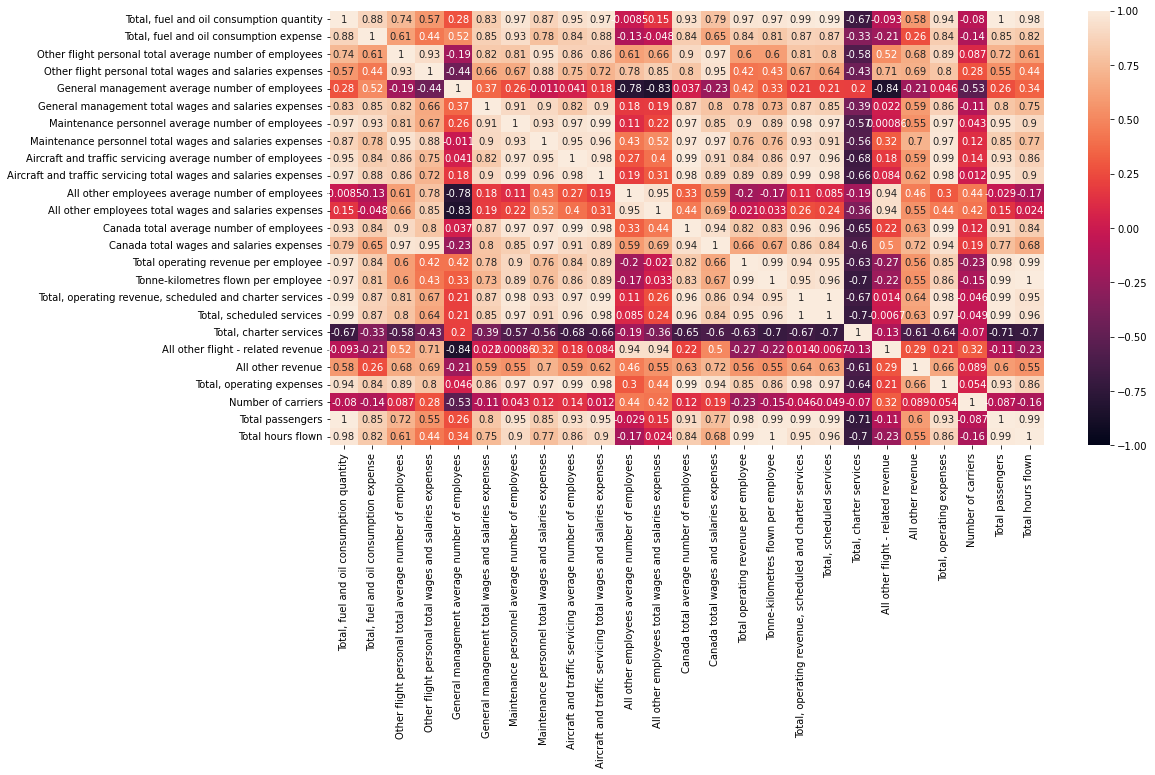

In [228]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, vmin=-1)

<AxesSubplot: ylabel='Count'>

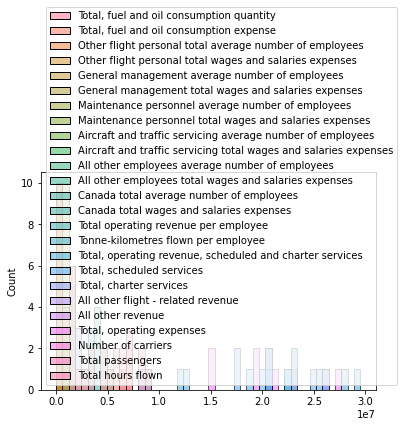

In [229]:
sns.histplot(df)

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date

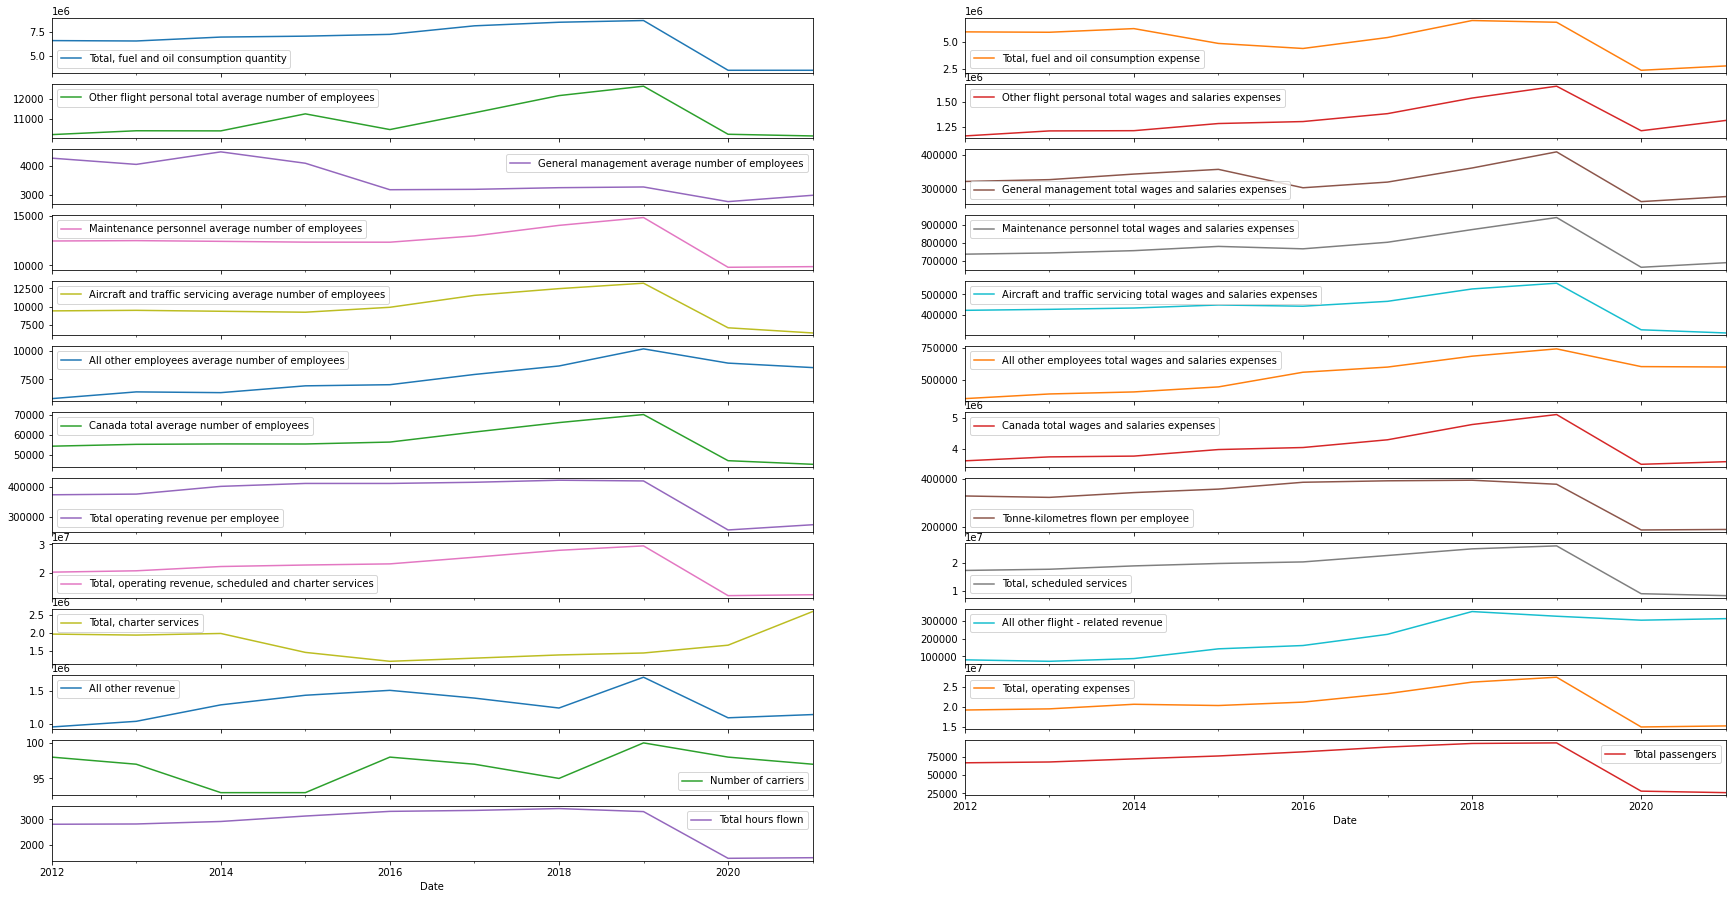

In [230]:
df.plot(subplots = True, figsize = (30,30), layout = (25,2))